In [1]:
#|export
import fastbook
fastbook.setup_book()

In [30]:
#|export
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *

In [3]:
#|export
!mkdir bear

A subdirectory or file bear already exists.


In [4]:
#|export
from bing_image_downloader import downloader

In [5]:
#|export
# downloader.download("Apple",limit = 5,output_dir = 'trail')

In [6]:
#|export
# results = search_images_ddg('grizzly bear')
# ims = results.attrgot('contentUrl')
# len(ims)

In [7]:
#|export
bear_types = 'grizzly','black','teddy'
path = Path('bear') 

In [8]:
#|export
# if path.exists():
#     for o in bear_types:
#         results = (f'{o} bear')
#         downloader.download(results,limit = 50,output_dir = 'bear')
       

In [9]:
#|export
fns = get_image_files(path)
fns

(#149) [Path('bear/black bear/Image_1.jpg'),Path('bear/black bear/Image_10.jpg'),Path('bear/black bear/Image_11.jpg'),Path('bear/black bear/Image_12.jpg'),Path('bear/black bear/Image_13.jpg'),Path('bear/black bear/Image_14.jpg'),Path('bear/black bear/Image_15.jpg'),Path('bear/black bear/Image_16.jpg'),Path('bear/black bear/Image_17.jpg'),Path('bear/black bear/Image_18.jpg')...]

In [10]:
#|export
failed = verify_images(fns)
failed

(#0) []

In [11]:
#|export
failed.map(Path.unlink);

In [12]:
#|export
bears = DataBlock(
    blocks= (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128))

In [13]:
#|export
dls = bears.dataloaders(path)

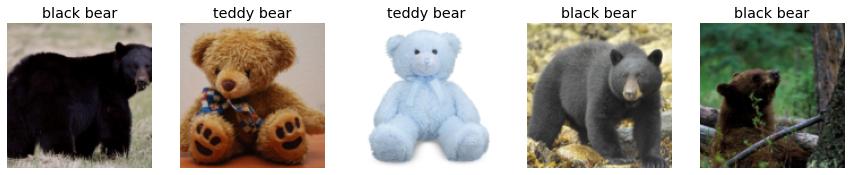

In [14]:
#|export
dls.valid.show_batch(max_n=5, nrows=1)

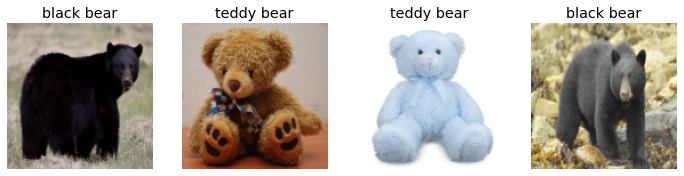

In [15]:
#|export
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

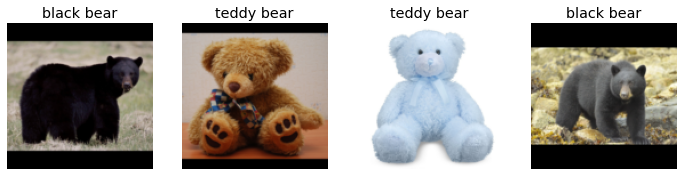

In [16]:
#|export
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

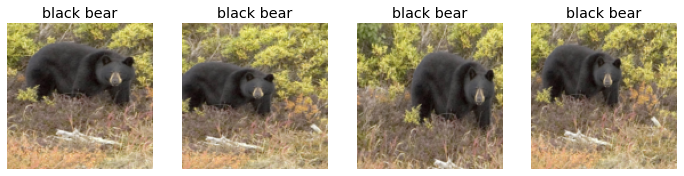

In [17]:
#|export
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

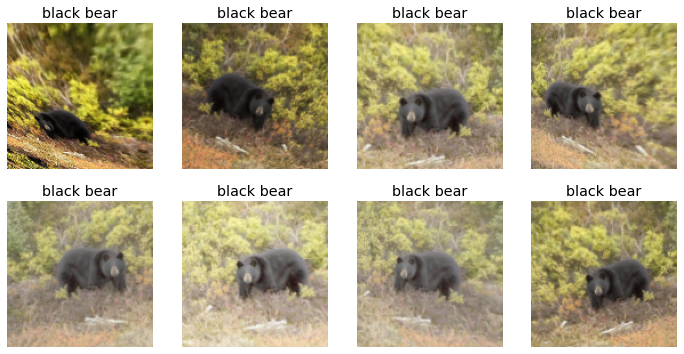

In [18]:
#|export
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [19]:
#|export
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [20]:
#|export
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

C:\Users\Aman Vishwakarma\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Aman Vishwakarma\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.864953,2.203343,0.793103,00:12


epoch,train_loss,valid_loss,error_rate,time
0,2.014216,1.382869,0.551724,00:13
1,1.661408,0.674994,0.275862,00:14
2,1.491414,0.319925,0.068965,00:14
3,1.223819,0.229882,0.034483,00:14
4,1.015212,0.226897,0.034483,00:13
5,0.853895,0.240409,0.034483,00:13
6,0.747712,0.270401,0.034483,00:13
7,0.660385,0.284918,0.034483,00:13
8,0.595497,0.283920,0.034483,00:13
9,0.539265,0.282026,0.034483,00:13


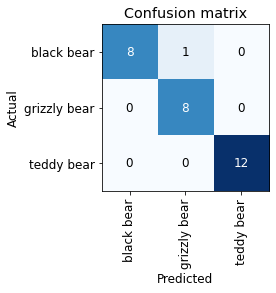

In [21]:
#|export
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

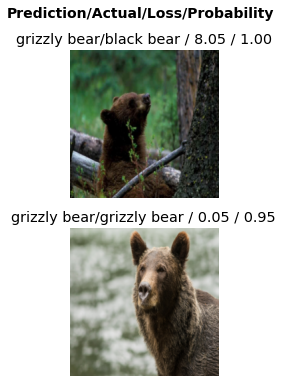

In [22]:
#|export
interp.plot_top_losses(2, nrows=2)


In [23]:
#|export
cleaner = ImageClassifierCleaner(learn)
cleaner

In [26]:
#|export
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [28]:
#/export
learn.export('model.pkl')

In [1]:
from nbdev.export import notebook2script

In [3]:
notebook2script('Model.ipynb')